In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.0-rc0


In [3]:
from tensorflow import keras

In [4]:
print(keras.__version__)

2.4.0


# 1. 이미지 분류기

## 데이터셋 적재하기

In [41]:
fashion_mnist = keras.datasets.fashion_mnist

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [43]:
X_train_full.shape

(60000, 28, 28)

In [44]:
X_train_full.dtype

dtype('uint8')

In [45]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [46]:
class_names = ["T-SHirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 모델 만들기

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## 모델 훈련과 평가

In [64]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 594us/step - loss: 0.9643 - accuracy: 0.6867 - val_loss: 0.5101 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 1s 507us/step - loss: 0.5008 - accuracy: 0.8239 - val_loss: 0.4602 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 1s 501us/step - loss: 0.4480 - accuracy: 0.8422 - val_loss: 0.4368 - val_accuracy: 0.8432
Epoch 4/30
1719/1719 [==============================] - 1s 504us/step - loss: 0.4184 - accuracy: 0.8526 - val_loss: 0.4137 - val_accuracy: 0.8526
Epoch 5/30
1719/1719 [==============================] - 1s 502us/step - loss: 0.4009 - accuracy: 0.8586 - val_loss: 0.3741 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 1s 506us/step - loss: 0.3766 - accuracy: 0.8688 - val_loss: 0.3707 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 1s 505us/step - loss: 0.3665 - accuracy: 0.8717 - val_loss: 0.3849 -

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

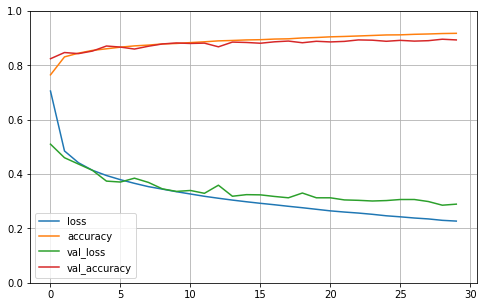

In [65]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 320us/step - loss: 0.3312 - accuracy: 0.8840


[0.33115333318710327, 0.8840000033378601]

## 모델 예측

In [67]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[ 7.1466222e-44,  0.0000000e+00,  8.9683102e-44, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -2.0000000e+00,
         0.0000000e+00, -2.0000000e+00,  1.8664672e+08,  2.3549907e+20,
         2.4821389e+05,  3.9505281e+30],
       [ 6.8885191e+22,  1.4183974e-19,  6.7289760e+08,  9.1756927e+02,
         5.3631910e-39,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -2.0000000e+00]], dtype=float32)

In [68]:
y_proba.round(2)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -2.0000000e+00,
         0.0000000e+00, -2.0000000e+00,  1.8664672e+08,  2.3549907e+20,
         2.4821391e+05,  3.9505281e+30],
       [ 6.8885191e+22,  0.0000000e+00,  6.7289760e+08,  9.1757001e+02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -2.0000000e+00]], dtype=float32)

In [70]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/yeomyungro/miniforge3/envs/atf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 9, 0])

# 2. 주택 가격 예측(회귀)

In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
housing = fetch_california_housing()

In [73]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 520us/step - loss: 1.4272 - val_loss: 0.6015
Epoch 2/20
363/363 [==============================] - 0s 374us/step - loss: 0.5472 - val_loss: 0.5049
Epoch 3/20
363/363 [==============================] - 0s 370us/step - loss: 0.4787 - val_loss: 0.5204
Epoch 4/20
363/363 [==============================] - 0s 368us/step - loss: 0.4752 - val_loss: 0.5085
Epoch 5/20
363/363 [==============================] - 0s 364us/step - loss: 0.5159 - val_loss: 0.4709
Epoch 6/20
363/363 [==============================] - 0s 363us/step - loss: 0.4315 - val_loss: 0.4593
Epoch 7/20
363/363 [==============================] - 0s 671us/step - loss: 0.4547 - val_loss: 0.4559
Epoch 8/20
363/363 [==============================] - 0s 370us/step - loss: 0.4100 - val_loss: 0.4647
Epoch 9/20
363/363 [==============================] - 0s 368us/step - loss: 0.4317 - val_loss: 0.4658
Epoch 10/20
363/363 [==============================] - 0s 367us/step - loss: 0.435

In [77]:
print(mse_test)

0.3959297239780426


In [99]:
for pred, answer in zip(y_pred, y_test):
    print("예측 : {:0.3f}, 정답 : {}, 차이(절대값) : {:0.3f}".format(pred[0], answer, abs(pred[0]-answer)))

예측 : 3.075, 정답 : 2.261, 차이(절대값) : 0.814
예측 : 0.878, 정답 : 0.698, 차이(절대값) : 0.180
예측 : 1.391, 정답 : 1.075, 차이(절대값) : 0.316


# 3. 함수형 API를 사용해 복잡한 모델 만들기

Wide&Deep 신경망 구조

In [106]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [107]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_18[0][0]             

In [108]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 596us/step - loss: 2.8786 - val_loss: 0.8514
Epoch 2/20
363/363 [==============================] - 0s 440us/step - loss: 0.8340 - val_loss: 0.7582
Epoch 3/20
363/363 [==============================] - 0s 442us/step - loss: 0.7347 - val_loss: 0.7139
Epoch 4/20
363/363 [==============================] - 0s 445us/step - loss: 0.6788 - val_loss: 0.6707
Epoch 5/20
363/363 [==============================] - 0s 732us/step - loss: 0.6400 - val_loss: 0.6357
Epoch 6/20
363/363 [==============================] - 0s 588us/step - loss: 0.5967 - val_loss: 0.6106
Epoch 7/20
363/363 [==============================] - 0s 452us/step - loss: 0.6399 - val_loss: 0.5896
Epoch 8/20
363/363 [==============================] - 0s 451us/step - loss: 0.5581 - val_loss: 0.5718
Epoch 9/20
363/363 [==============================] - 0s 450us/step - loss: 0.5348 - val_loss: 0.5610
Epoch 10/20
363/363 [==============================] - 0s 452us/step - loss: 0.517

In [109]:
print(mse_test)

0.45962586998939514


일부 특성은 짧은 경로로 전달하고 다른 특성들(중복 가능)은 깊은 경로로 전달하고 싶은 경우

In [112]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [113]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
____________________________________________________________________________________________

In [114]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)

Epoch 1/20
363/363 [==============================] - 0s 620us/step - loss: 3.7363 - val_loss: 0.9034
Epoch 2/20
363/363 [==============================] - 0s 460us/step - loss: 0.8755 - val_loss: 0.7139
Epoch 3/20
363/363 [==============================] - 0s 455us/step - loss: 0.6742 - val_loss: 0.6585
Epoch 4/20
363/363 [==============================] - 0s 458us/step - loss: 0.6123 - val_loss: 0.6325
Epoch 5/20
363/363 [==============================] - 0s 464us/step - loss: 0.6098 - val_loss: 0.6141
Epoch 6/20
363/363 [==============================] - 0s 728us/step - loss: 0.5732 - val_loss: 0.5997
Epoch 7/20
363/363 [==============================] - 0s 461us/step - loss: 0.5824 - val_loss: 0.5868
Epoch 8/20
363/363 [==============================] - 0s 463us/step - loss: 0.5564 - val_loss: 0.5754
Epoch 9/20
363/363 [==============================] - 0s 451us/step - loss: 0.5461 - val_loss: 0.5662
Epoch 10/20
363/363 [==============================] - 0s 455us/step - loss: 0.531

# 4. 모델 저장과 복원

## 모델 저장

In [115]:
model.save("my_keras_model.h5")

## 모델 복원

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

## 훈련 도중 일정 간격으로 체크포인트 저장

매 에포크의 끝마다 저장

In [117]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True) # 훈련 시 검증 세트를 이용할 때 최상의 검증 세트 점수에서만 모델 저장
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 복원

Epoch 1/20
363/363 [==============================] - 0s 530us/step - loss: 0.4866 - val_loss: 0.5067
Epoch 2/20
363/363 [==============================] - 0s 465us/step - loss: 0.4890 - val_loss: 0.5040
Epoch 3/20
363/363 [==============================] - 0s 461us/step - loss: 0.4834 - val_loss: 0.5028
Epoch 4/20
363/363 [==============================] - 0s 458us/step - loss: 0.4825 - val_loss: 0.4999
Epoch 5/20
363/363 [==============================] - 0s 460us/step - loss: 0.4780 - val_loss: 0.4997
Epoch 6/20
363/363 [==============================] - 0s 570us/step - loss: 0.4771 - val_loss: 0.4989
Epoch 7/20
363/363 [==============================] - 0s 561us/step - loss: 0.4765 - val_loss: 0.4950
Epoch 8/20
363/363 [==============================] - 0s 461us/step - loss: 0.4734 - val_loss: 0.4954
Epoch 9/20
363/363 [==============================] - 0s 461us/step - loss: 0.4707 - val_loss: 0.4913
Epoch 10/20
363/363 [==============================] - 0s 459us/step - loss: 0.472

일정 에포크(*patience* 매개변수로 지정) 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[chekcpoint_cb, early_stopping_cb])

keras.callbacks 패키지에 다른 종류의 콜백들이 많음(참고:https://keras.io/callbacks)

# 5. 하이퍼파라미터 튜닝